In [4]:
import tensorflow as tf
import itertools
import numpy as np
ds = tf.contrib.distributions

In [52]:
import matplotlib.pyplot as plt

To generate and save synthetic data:

In [78]:
def create_distribution_grid(batch_size, num_components = 25, num_features=2, **kwargs):
    cat = ds.Categorical(tf.zeros(num_components, dtype='float32'))
    mus = np.array([np.array([i, j]) for i, j in itertools.product(range(-4, 5, 2),
                                                           range(-4, 5, 2))],dtype='float32')

    s = 0.05
    sigmas = [np.array([s,s]).astype('float32') for i in range(num_components)]
    components = list((ds.MultivariateNormalDiag(mu, sigma) 
                       for (mu, sigma) in zip(mus, sigmas)))
    data = ds.Mixture(cat, components)
    return data.sample(batch_size)

def create_distribution_ring(batch_size, num_components = 8, num_features=2, **kwargs):
    cat = ds.Categorical(tf.zeros(num_components, dtype='float32'))
    mus = np.array([[2,0], [2**0.5,2**0.5], [0,2], [-2**0.5, 2**0.5],
                   [-2,0], [-2**0.5, -2**0.5], [0,-2], [2**0.5, -2**0.5]],dtype='float32')

    s = 0.05
    sigmas = [np.array([s,s]).astype('float32') for i in range(num_components)]
    components = list((ds.MultivariateNormalDiag(mu, sigma) 
                       for (mu, sigma) in zip(mus, sigmas)))
    data = ds.Mixture(cat, components)
    return data.sample(batch_size)

def create_distribution_Hdim(batch_size, num_components = 9, num_features=800, **kwargs):
    cat = ds.Categorical(tf.zeros(num_components, dtype='float32'))
    mus = np.array([[0 for i in range(500)] + [0 for i in range(300)],[0 for i in range(250)]+[1 for i in range(250)]+[0 for i in range(300)],[1 for i in range(250)]+[0 for i in range(250)]+[0 for i in range(300)], [1 for i in range(500)]+[0 for i in range(300)],
                   [-1 for i in range(250)]+[0 for i in range(250)]+[0 for i in range(300)], [0 for i in range(250)]+[-1 for i in range(250)]+[0 for i in range(300)],
                   [-1 for i in range(250)]+[1 for i in range(250)]+[0 for i in range(300)], [-1 for i in range(500)]+[0 for i in range(300)],
                   [1 for i in range(250)]+[-1 for i in range(250)]+[0 for i in range(300)]], dtype='float32')
    s = 0.05
    sigmas = [np.array([s for i in range(800)]).astype('float32') for i in range(num_components)]
    components = list((ds.MultivariateNormalDiag(mu, sigma) 
                       for (mu, sigma) in zip(mus, sigmas)))
    data = ds.Mixture(cat, components)
    return data.sample(batch_size)

2D mixture of 25 Gaussian Grid:

In [34]:
y = create_distribution_grid(500000)
sess = tf.InteractiveSession()
y_array = sess.run(y)
np.save('2d_grid.npy', y_array)

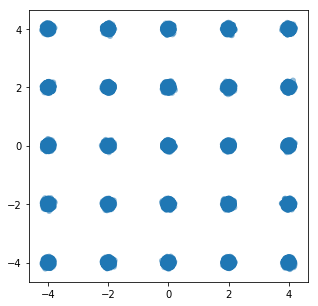

In [55]:
fig1 = plt.figure(figsize=(5,5), facecolor='w')
plt.scatter(y_array[:, 0], y_array[:, 1], edgecolor='none', alpha=0.5)
plt.show()

2D mixture of 8 Gaussian Ring:

In [59]:
y_ring = create_distribution_ring(500000)
sess = tf.InteractiveSession()
y_ring_array = sess.run(y_ring)
np.save('2d_ring.npy', y_ring_array)

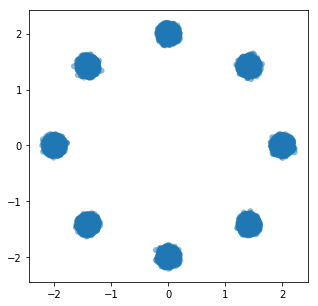

In [60]:
fig2 = plt.figure(figsize=(5,5), facecolor='w')
plt.scatter(y_ring_array[:, 0], y_ring_array[:, 1], edgecolor='none', alpha=0.5)
plt.show()

Nine 500D Gaussian embedded in 800D space:

In [79]:
y_hd = create_distribution_Hdim(500000)
sess = tf.InteractiveSession()
y_hd_array = sess.run(y_hd)
np.save('500d_em800.npy', y_hd_array)

In [83]:
np.shape(y_hd_array)

(500000, 800)

Generate test data (each has 100000 samples):

In [105]:
y_test = create_distribution_grid(100000)
sess = tf.InteractiveSession()
y_test_array = sess.run(y_test)
np.save('2d_grid_test.npy', y_test_array)

In [106]:
y_test = create_distribution_ring(100000)
sess = tf.InteractiveSession()
y_test_array = sess.run(y_test)
np.save('2d_ring_test.npy', y_test_array)

In [108]:
y_test = create_distribution_Hdim(100000)
sess = tf.InteractiveSession()
y_test_array = sess.run(y_test)
np.save('2d_hd_test.npy', y_test_array)

To load data, devide them into batches, and convert them to tensor:

In [93]:
def load_data(filename, batch_size, batch_num):
    y = np.load(filename)
    batch_list = []
    ind_i = 0
    for i in range(batch_num):
        if ind_i + batch_size <= np.shape(y)[0]:
            batch_list.append(tf.convert_to_tensor(y[ind_i:(ind_i + batch_size),:], np.float32))
            ind_i = ind_i + batch_size
        else:
            batch_list.append(tf.convert_to_tensor(y[ind_i:np.shape(y)[0],:], np.float32))
            return 
    return batch_list

The load_data function returns a list. Each element of that list is a tensor type data, used as one batch in the training process.

In [104]:
batch_y_grid = load_data('2d_grid.npy', 500, 1000)